In [64]:
# Imports and settings
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
sns.set(style="whitegrid")
%matplotlib inline

# Student Exam Prediction
This notebook trains a **Random Forest** classifier to predict the exam `result` (0 = fail, 1 = pass) using `hours_studied` and `subject`.
Steps: load data, inspect & clean, encode categorical features, split into train/test, train the model, and evaluate performance with metrics and plots.

In [65]:
# Load dataset (robust path) and show a sample
DATA_PATH = Path(__file__).parent / "dataset" / "students.csv" if '__file__' in globals() else Path("dataset") / "students.csv"
print("Loading:", DATA_PATH)
df = pd.read_csv(DATA_PATH)
print("Dataset shape:", df.shape)
df.head()

Loading: dataset\students.csv
Dataset shape: (58, 4)


,student_name,hours_studied,result,subject
0,Emma Wilson,1,0,Math
1,Noah Johnson,2,0,Math
2,Olivia Brown,3,0,Math
3,Liam Smith,4,0,Math
4,Ava Jones,5,1,Math


Missing values:
 student_name     0
hours_studied    0
result           0
subject          0
dtype: int64
Duplicates: 0

Summary statistics:
       hours_studied     result
count      58.000000  58.000000
mean        5.913793   0.620690
std         2.780158   0.489453
min         1.000000   0.000000
25%         4.000000   0.000000
50%         6.000000   1.000000
75%         8.000000   1.000000
max        12.000000   1.000000


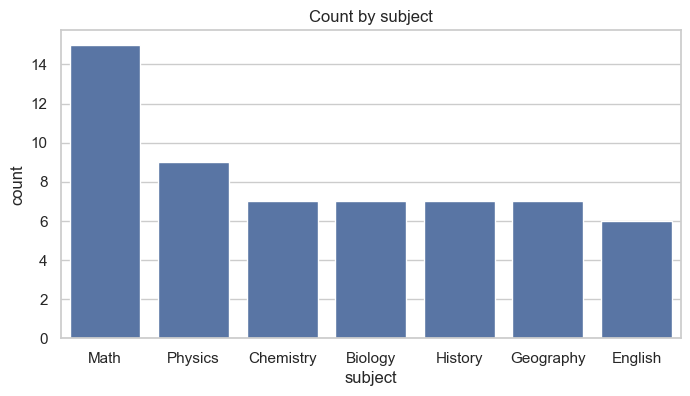

In [ ]:
# Quick checks and basic EDA
print("Missing values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

# If duplicates exist, drop them
if df.duplicated().any():
    df = df.drop_duplicates().reset_index(drop=True)
print('\nSummary statistics:')
print(df.describe())

# Subject distribution plot
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='subject', order=df['subject'].value_counts().index)
plt.title('Count by subject')
plt.show()

In [ ]:
# Preprocessing: encode categorical variables and prepare X, y
X = df[['hours_studied', 'subject']].copy()
X = pd.get_dummies(X, columns=['subject'], drop_first=True)  # avoid multicollinearity
y = df['result']
print("Feature columns:\n", X.columns.tolist())
X.head()

Feature columns:
 ['hours_studied', 'subject_Chemistry', 'subject_English', 'subject_Geography', 'subject_History', 'subject_Math', 'subject_Physics']


,hours_studied,subject_Chemistry,subject_English,subject_Geography,subject_History,subject_Math,subject_Physics
0,1,False,False,False,False,True,False
1,2,False,False,False,False,True,False
2,3,False,False,False,False,True,False
3,4,False,False,False,False,True,False
4,5,False,False,False,False,True,False


In [68]:
# Train/test split (stratify to keep class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Train Random Forest and print cross-validated score
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print(f"CV accuracy (5-fold) mean: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

CV accuracy (5-fold) mean: 0.913 ± 0.044


Test Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.88      1.00      0.93         7

    accuracy                           0.92        12
   macro avg       0.94      0.90      0.91        12
weighted avg       0.93      0.92      0.91        12



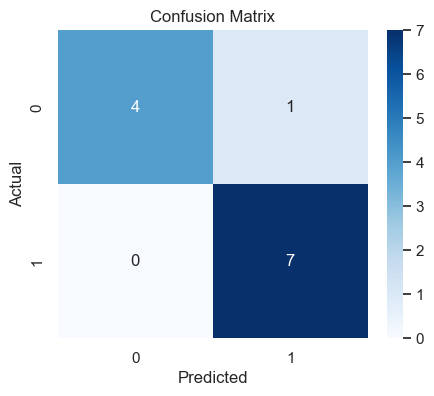

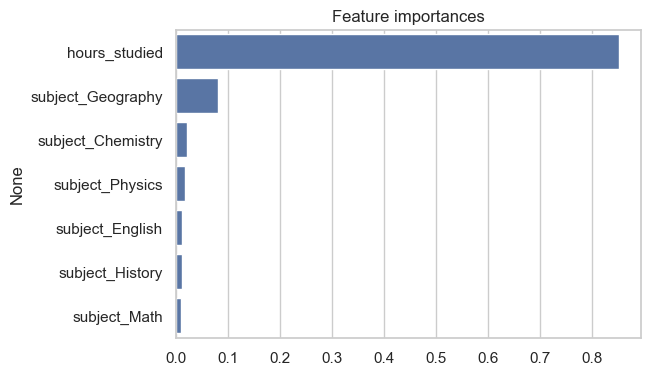

In [ ]:
# Evaluation on test set
y_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Feature importances
feat_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title('Feature importances')
plt.show()